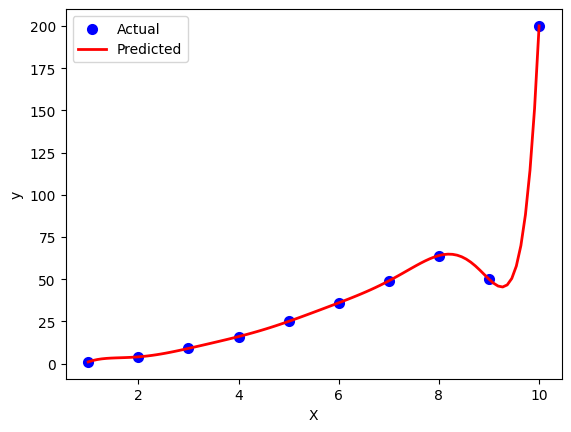

In [ ]:
#Polynomial Regression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = np.array([1,4,9,16,25,36,49,64,50,200])
X,Y = X.reshape(-1,1), Y.reshape(-1,1)

poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

X_test = np.array([1,2,3,4,5,6,7,8,9,10])
X_test = X_test.reshape(-1,1)
X_test = poly_features.fit_transform(X_test)

# y_pred = model.predict(X_test)

X_plot = np.linspace(1, 10, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.scatter(X, Y, color='blue', linewidths=2,label='Actual')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


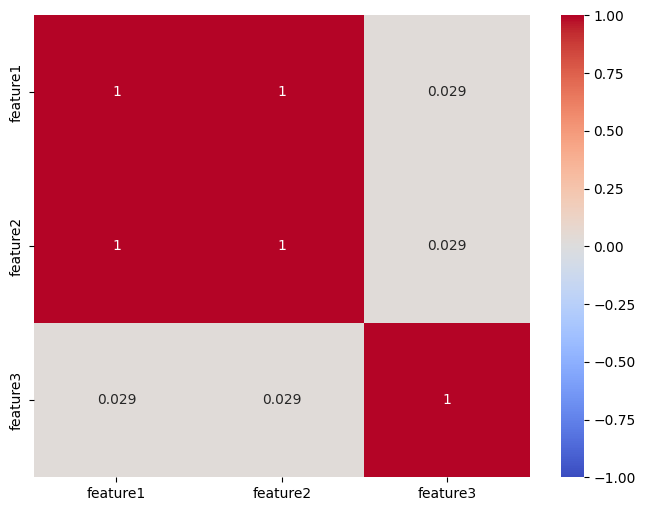

In [ ]:
#Correlation matrix

import pandas as pd
import seaborn as sns

data = {'feature1':[1,2,3,4,5],
        'feature2':[10000,20000,30000,40000,50000],
        'feature3':[-1,3,100,-1,5]}

dataframe = pd.DataFrame(data)
corr_matrix = dataframe.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

100   -10.384652
101   -10.384652
102   -10.384652
103   -10.384652
104   -10.384652
         ...    
195   -10.384652
196   -10.384652
197   -10.384652
198   -10.384652
199   -10.384652
Name: predicted_mean, Length: 100, dtype: float64


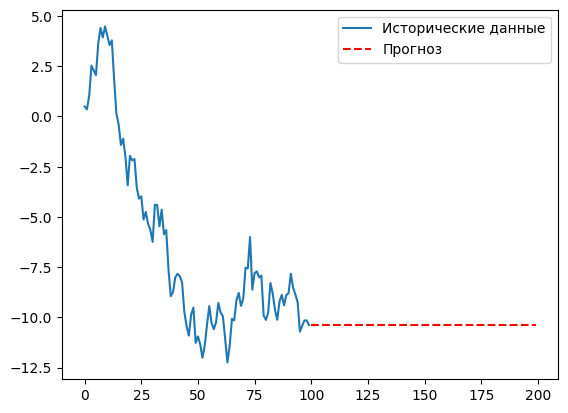

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


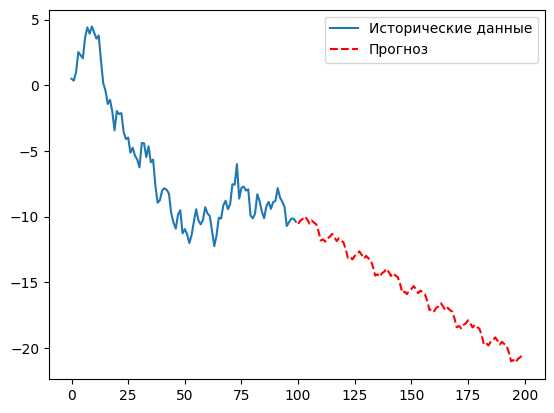

In [ ]:
#ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Генерируем искусственные данные
np.random.seed(42)
data = np.cumsum(np.random.randn(100))  # случайный временной ряд
df = pd.DataFrame(data, columns=["value"])

# Обучение модели ARIMA (p, d, q)
p, d, q = 0, 1, 0  # параметры модели
model = ARIMA(df["value"], order=(p, d, q))
fitted_model = model.fit()

# Прогноз на 10 шагов вперед
forecast = fitted_model.forecast(steps=100)
print(forecast)

# Визуализация
plt.plot(df.index, df["value"], label="Исторические данные")
plt.plot(range(len(df), len(df) + 100), forecast, label="Прогноз", linestyle="dashed", color="red")
plt.legend()
plt.show()

#Sarima

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Параметры SARIMA (p, d, q) x (P, D, Q, m)
model = SARIMAX(df["value"], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
fitted_model = model.fit()

# Прогноз
forecast = fitted_model.forecast(steps=100)

plt.plot(df.index, df["value"], label="Исторические данные")
plt.plot(range(len(df), len(df) + 100), forecast, label="Прогноз", linestyle="dashed", color="red")
plt.legend()
plt.show()

In [2]:
#Logit

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1️⃣ Генерируем данные
np.random.seed(42)
n = 100
income = np.random.normal(50, 15, n)  # Доход
purchase_prob = 1 / (1 + np.exp(-0.1 * (income - 50)))  # Логистическая вероятность
purchase = np.random.binomial(1, purchase_prob)  # Бинарная переменная (0 или 1)

# 2️⃣ Создаем DataFrame
df = pd.DataFrame({"income": income, "purchase": purchase})

# 3️⃣ Разделяем данные на train/test
X = df[["income"]]
y = df["purchase"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Обучаем логистическую регрессию
model = LogisticRegression()
model.fit(X_train, y_train)

# 5️⃣ Делаем предсказания
y_pred = model.predict(X_test)

# 6️⃣ Оцениваем точность
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")


Точность модели: 0.60


In [3]:
#probit

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm

# 1️⃣ Генерируем случайные данные
np.random.seed(42)
n = 100
income = np.random.normal(50, 15, n)  # Доход
purchase_prob = norm.cdf(0.1 * (income - 50))  # Пробит-вероятность
purchase = np.random.binomial(1, purchase_prob)  # 0 или 1 (покупка)

# 2️⃣ Создаем DataFrame
df = pd.DataFrame({"income": income, "purchase": purchase})

# 3️⃣ Добавляем константу для модели
X = sm.add_constant(df["income"])  # Добавляем константу
y = df["purchase"]

# 4️⃣ Обучаем пробит-регрессию
model = sm.Probit(y, X)
result = model.fit()
print(result.summary())

# 5️⃣ Делаем предсказания
df["predicted_prob"] = result.predict(X)

# 6️⃣ Выводим первые строки
print(df.head())

Optimization terminated successfully.
         Current function value: 0.387496
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  100
Model:                         Probit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Feb 2025   Pseudo R-squ.:                  0.4351
Time:                        08:28:23   Log-Likelihood:                -38.750
converged:                       True   LL-Null:                       -68.593
Covariance Type:            nonrobust   LLR p-value:                 1.112e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9392      1.112     -5.339      0.000      -8.120      -3.759
income         0.1164      0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.07198e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+01, tolerance: 6.453e-03
  model = cd_fast.enet_coordinate_descent(


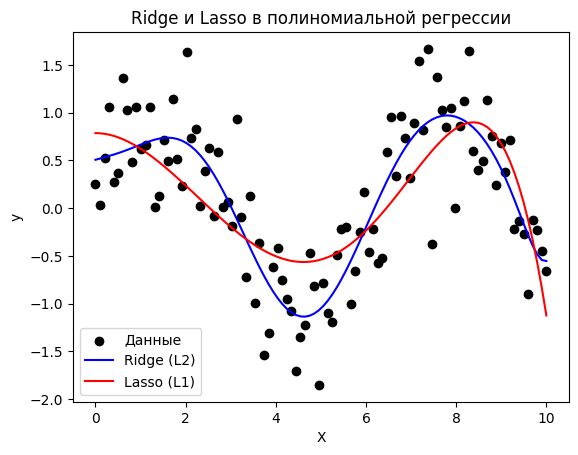

In [4]:
#Ridge & Lasso Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline

# 1️⃣ Генерируем данные
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.5, size=X.shape)  # Истинная функция + шум

# 2️⃣ Полиномиальная регрессия 10-й степени (переобученная модель)
poly_degree = 10

# Ridge (L2)
ridge = make_pipeline(PolynomialFeatures(poly_degree), Ridge(alpha=1.0))
ridge.fit(X, y)

# Lasso (L1)
lasso = make_pipeline(PolynomialFeatures(poly_degree), Lasso(alpha=0.1))
lasso.fit(X, y)

# 3️⃣ График предсказаний
plt.scatter(X, y, color="black", label="Данные")  # Исходные точки
plt.plot(X, ridge.predict(X), color="blue", label="Ridge (L2)")
plt.plot(X, lasso.predict(X), color="red", label="Lasso (L1)")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge и Lasso в полиномиальной регрессии")
plt.show()

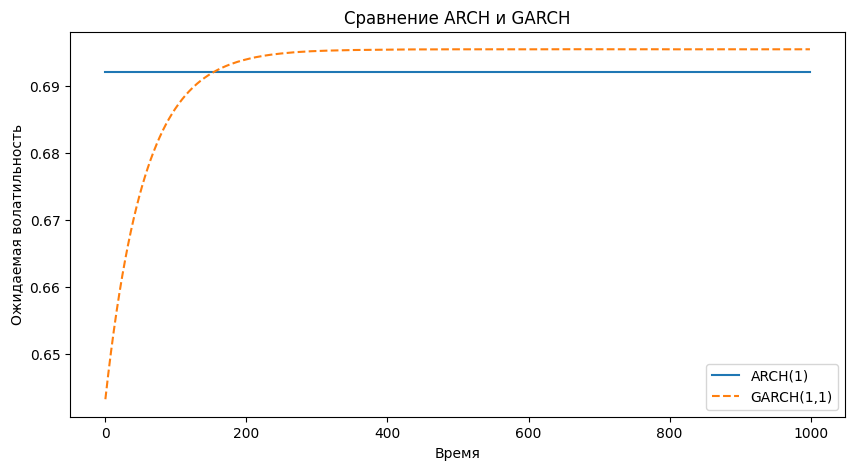

In [7]:
#GARCH/ARCH

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# 1️⃣ Генерируем искусственный временной ряд (имитация фондового рынка)
np.random.seed(42)
n = 1000
returns = np.random.normal(0, 1, n) * np.sqrt(0.5)  # Случайные доходности

# 2️⃣ Обучаем ARCH (p=1)
arch_model_fit = arch_model(returns, vol="ARCH", p=1).fit(disp="off")

# 3️⃣ Обучаем GARCH (p=1, q=1)
garch_model_fit = arch_model(returns, vol="GARCH", p=1, q=1).fit(disp="off")

# 4️⃣ Предсказываем волатильность
arch_vol = arch_model_fit.conditional_volatility
garch_vol = garch_model_fit.conditional_volatility

# 5️⃣ График
plt.figure(figsize=(10,5))
plt.plot(arch_vol, label="ARCH(1)")
plt.plot(garch_vol, label="GARCH(1,1)", linestyle="dashed")
plt.legend()
plt.title("Сравнение ARCH и GARCH")
plt.xlabel("Время")
plt.ylabel("Ожидаемая волатильность")
plt.show()

In [ ]:
#XGBoost

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Загрузка данных
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Определение сетки параметров
param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [3, 5, 7],  # Глубина деревьев
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'subsample': [0.8, 1],  # Доля выборки при построении деревьев
}

# Запуск Grid Search с кросс-валидацией (cv=5 - разбиение на 5 фолдов)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат (MSE): {-grid_search.best_score_:.4f}")

In [ ]:
#Weighted Least Squares

In [ ]:
#Descriptive Statistics

In [ ]:
#Generalized Least Squares

In [ ]:
#Stepwise Regression